<a href="https://colab.research.google.com/github/raydangaspar/covid-19/blob/master/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

Ficha de notificação:
https://opendatasus.saude.gov.br/dataset/ae90fa8f-3e94-467e-a33f-94adbb66edf8/resource/54a46c6d-e0b5-40b7-8b74-85450d22ace3/download/ficha_notificacao_srag_atual.pdf

Dados 2019 à data atual:
https://opendatasus.saude.gov.br/dataset/bd-srag-2020

Dados somente de 2021:
https://opendatasus.saude.gov.br/dataset/bd-srag-2021

Dicionário dos dados:
https://opendatasus.saude.gov.br/dataset/ae90fa8f-3e94-467e-a33f-94adbb66edf8/resource/8f571374-c555-4ec0-8e44-00b1e8b11c25/download/dicionario_de_dados_srag_hospitalizado_atual-sivepgripe.pdf

In [2]:
# database 2019, 2020 and 2021 
# database = 'https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-25-01-2021.csv'
database = 'https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-08-02-2021.csv'
# database from 2021 only
# database = 'https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2021/INFLUD21-25-01-2021.csv'

date_columns = [
    "DT_NOTIFIC", "DT_SIN_PRI", "DT_NASC", "DT_VGM", "DT_RT_VGM", 
    "DT_UT_DOSE", "DT_VAC_MAE", "DT_DOSEUNI", "DT_1_DOSE", "DT_2_DOSE", 
    "DT_ANTIVIR", "DT_INTERNA", "DT_ENTUTI", "DT_SAIDUTI", "DT_RAIOX", 
    "DT_TOMO", "DT_COLETA", "DT_RES_AN", "DT_PCR", "DT_CO_SOR",
    "DT_RES", "DT_EVOLUCA", "DT_ENCERRA", "DT_DIGITA"
]

# OBES_IMC is float, but is formated with comma instead of dot (ex: 41,5)
# COD_IDADE has a wrong row value. Should be int type
types_dict = {
    "COD_IDADE": "string",
    "CS_ETINIA": "string",
    "OBES_IMC": "string",
    "FLUBLI_OUT": "string",
    "CLASSI_OUT": "string",
    "FLUASU_OUT": "string",
    "DS_PCR_OUT": "string",
    "OUT_ANIM": "string",
    "PAIS_VGM": "string",
    "LO_PS_VGM": "string",
    "DS_AN_OUT": "string"
}

df_srag = pd.read_csv(database, sep=';', parse_dates=date_columns, dayfirst=True, dtype=types_dict)

In [3]:
# Solving Mixed Data problems
# name of the column
# df_srag[df_srag.columns[123]].notnull()
# column data value without NaN values
# df_srag[df_srag[df_srag.columns[123]].notnull()]["OUT_ANIM"]

In [4]:
df_srag.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,2020-01-07,2,2020-01-03,1,DF,NaN,NaN,BRASILIA,530010,HRT HOSPITAL REGIONAL DE TAGUATINGA,10499,M,2018-06-08,1,3,3001,6,4.0,<NA>,5.0,BRASIL,1,DF,NaN,NaN,TAGUATINGA,530180.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,9.0,1.0,1.0,2.0,2.0,1.0,...,0,<NA>,NaN,<NA>,NaT,NaT,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,5,2020-01-26,5,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HIAS HOSPITAL INFANTIL ALBERT SABIN,2563681,M,2019-04-05,9,2,2009,6,4.0,<NA>,5.0,BRASIL,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,<NA>,NaN,<NA>,NaT,NaT,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaT,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-16,3,2020-01-10,2,SP,GVE XXXIII TAUBATE,1352.0,TAUBATE,355410,HOSPITAL REGIONAL DO VALE DO PARAIBA,3126838,M,2018-11-14,1,3,3001,6,1.0,<NA>,5.0,BRASIL,1,SP,GVE XXXIII TAUBATE,1352.0,TREMEMBE,355480.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,...,0,<NA>,NaN,<NA>,NaT,NaT,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaT,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-13,7,2020-02-08,6,SP,GVE XXXI SOROCABA,1353.0,SALTO,354520,HOSPITAL E MATERNIDADE MUNICIPAL N S DO MONTE ...,3774554,F,1962-05-01,57,3,3057,5,1.0,<NA>,9.0,BRASIL,1,SP,GVE XXXI SOROCABA,1353.0,SALTO,354520.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,...,0,<NA>,NaN,<NA>,NaT,NaT,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaT,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-09,11,2020-03-05,10,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,CENTRO MEDICO COMUNITARIO BAIRRO NOVO,16462,F,1990-05-18,29,3,3029,3,1.0,<NA>,3.0,BRASIL,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2,<NA>,NaN,<NA>,NaT,NaT,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaT,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# iterating the columns 
for col in df_srag.columns: 
    print(col) 
len(df_srag.columns)
# print(df_srag.dtypes)

DT_NOTIFIC
SEM_NOT
DT_SIN_PRI
SEM_PRI
SG_UF_NOT
ID_REGIONA
CO_REGIONA
ID_MUNICIP
CO_MUN_NOT
ID_UNIDADE
CO_UNI_NOT
CS_SEXO
DT_NASC
NU_IDADE_N
TP_IDADE
COD_IDADE
CS_GESTANT
CS_RACA
CS_ETINIA
CS_ESCOL_N
ID_PAIS
CO_PAIS
SG_UF
ID_RG_RESI
CO_RG_RESI
ID_MN_RESI
CO_MUN_RES
CS_ZONA
SURTO_SG
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OBES_IMC
OUT_MORBI
MORB_DESC
VACINA
DT_UT_DOSE
MAE_VAC
DT_VAC_MAE
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
OUT_ANTIV
DT_ANTIVIR
HOSPITAL
DT_INTERNA
SG_UF_INTE
ID_RG_INTE
CO_RG_INTE
ID_MN_INTE
CO_MU_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
RAIOX_OUT
DT_RAIOX
AMOSTRA
DT_COLETA
TP_AMOSTRA
OUT_AMOST
PCR_RESUL
DT_PCR
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
FLUASU_OUT
PCR_FLUBLI
FLUBLI_OUT
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_M

154

In [6]:
# print coluna
# print(df_srag['DT_NASC'])

# print linhas específicas da coluna
print(df_srag['DT_NASC'].head())

0   2018-06-08
1   2019-04-05
2   2018-11-14
3   1962-05-01
4   1990-05-18
Name: DT_NASC, dtype: datetime64[ns]


In [7]:
# Gráfico: Data do início dos sintomas x Confirmação diagnóstico Covid-19 por PCR
df1 = df_srag[['DT_SIN_PRI', 'PCR_SARS2']].copy()

df1 = df1.groupby(['DT_SIN_PRI'], as_index=False).agg({'PCR_SARS2':sum})

# tirar o último mês de dados
n = 30
df1.drop(df1.tail(n).index, inplace = True) 

most_recent_date = df1['DT_SIN_PRI'].max()
print(f'Most recent date: {most_recent_date}')

Most recent date: 2020-12-03 00:00:00


In [8]:
trace = go.Scatter(x = df1['DT_SIN_PRI'],
                   y = df1['PCR_SARS2'],
                   mode = 'markers')
 
data = [trace]

layout = dict(title = 'Data do início dos sintomas x Confirmação diagnóstico de Covid-19 por PCR',
              xaxis = dict(title = 'Data dos primeiros sintomas'),
              yaxis = dict(title = 'Número de pacientes confirmados por PCR'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig)

In [9]:
# Gráfico: Data do início dos sintomas x Confirmação diagnóstico Covid-19 

df_class_fin = df_srag[['DT_SIN_PRI', 'CLASSI_FIN']].copy()

# 5 -> infecção por covid-19 confirmada
df_class_fin = df_class_fin[df_class_fin['CLASSI_FIN'] == 5]

# df_class_fin = df_class_fin.groupby(['DT_SIN_PRI'], as_index=False).agg({'CLASSI_FIN':sum})

# agrupando e somando o número de pessoas com Covid-19 na data
df_class_fin = df_class_fin.groupby(['DT_SIN_PRI','CLASSI_FIN']).DT_SIN_PRI.agg('count').to_frame('SUM').reset_index()

n = 30 # tirar o último mês de dados
df_class_fin.drop(df_class_fin.tail(n).index, inplace = True) 

most_recent_date = df_class_fin['DT_SIN_PRI'].max()
print(f'Most recent date: {most_recent_date}')

Most recent date: 2020-12-03 00:00:00


In [10]:
# trace = go.Scatter(x = df_class_fin['DT_SIN_PRI'],
#                    y = df_class_fin['CLASSI_FIN'],
#                    mode = 'markers')

trace = go.Scatter(x = df_class_fin['DT_SIN_PRI'],
                   y = df_class_fin['SUM'],
                   mode = 'markers')
 
data = [trace]
                   
layout = dict(title = 'Data do início dos sintomas x Confirmação diagnóstico Covid-19',
              xaxis = dict(title = 'Data dos primeiros sintomas'),
              yaxis = dict(title = 'Número de pacientes confirmados com Covid-19'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig)

In [11]:
# Gráfico: Data do resultado do exame x Confirmação diagnóstico Covid-19
# Mostra como o dia da semana influencia na divulgação das confirmações
# Final de semana confirmam-se menos pessoas

df_class_fin_and_diagnosis_date = df_srag[['DT_RES', 'CLASSI_FIN']].copy()

# 5 -> infecção por covid-19 confirmada
df_class_fin_and_diagnosis_date = df_class_fin_and_diagnosis_date[df_class_fin_and_diagnosis_date['CLASSI_FIN'] == 5]

# remove linhas com valores null
df_class_fin_and_diagnosis_date.dropna(how='any', inplace=True)

# Uma data formatada errada está evitando que a coluna seja convertida em datetime
# Excluir a linha com problema: 07/12/220
df_class_fin_and_diagnosis_date = df_class_fin_and_diagnosis_date[df_class_fin_and_diagnosis_date.DT_RES != "07/12/220"]
df_class_fin_and_diagnosis_date['DT_RES'] = pd.to_datetime(df_class_fin_and_diagnosis_date['DT_RES'], dayfirst=True, errors='coerce')

df_class_fin_and_diagnosis_date['DT_RES'] = df_class_fin_and_diagnosis_date[(df_class_fin_and_diagnosis_date['DT_RES'].dt.year == 2020)]  
  # (df_class_fin_and_diagnosis_date['DT_RES'].dt.year == 2020) | (df_class_fin_and_diagnosis_date['DT_RES'].dt.year == 2021 )]

# df_class_fin_and_diagnosis_date = df_class_fin_and_diagnosis_date.groupby(['DT_RES'], as_index=False).agg({'CLASSI_FIN':sum})

# agrupando e somando o número de pessoas com Covid-19 na data
df_class_fin_and_diagnosis_date = df_class_fin_and_diagnosis_date.groupby(
    ['DT_RES','CLASSI_FIN']).DT_RES.agg('count').to_frame('SUM').reset_index()

In [12]:
# trace = go.Scatter(x = df_class_fin_and_diagnosis_date['DT_RES'],
#                    y = df_class_fin_and_diagnosis_date['CLASSI_FIN'],
#                    mode = 'markers')

trace = go.Scatter(x = df_class_fin_and_diagnosis_date['DT_RES'],
                   y = df_class_fin_and_diagnosis_date['SUM'],
                   mode = 'markers')
 
data = [trace]
                   
layout = dict(title = 'Confirmações de Covid-19 por Data',
              xaxis = dict(title = 'Data divulgação resultado de exame de Covid-19'),
              yaxis = dict(title = 'Número de resultados divulgados'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig)

In [13]:
# Método PCR
# Diferença de dias entre o início dos sintomas e a confirmação do diagnóstico

df_test = df_srag.copy()

# Pega linhas sem valores nulos
df_test = df_test[df_test['DT_PCR'].notna()]

# df_test['Difference'] = df_test['DT_SIN_PRI'].sub(df_test['DT_PCR'], axis=0)
df_test[['DT_SIN_PRI', 'DT_PCR']].head()
# df_test[['DT_SIN_PRI', 'DT_PCR', 'Difference']].head(50)

,DT_SIN_PRI,DT_PCR
1,2020-01-26,2020-01-29
2,2020-01-10,2020-02-07
3,2020-02-08,2020-02-17
4,2020-03-05,2020-03-10
5,2020-03-10,2020-03-19


In [14]:
# Diferença de dias entre o início dos sintomas e a coleta do exame
df_test = df_srag.copy()

# Pega linhas sem valores nulos
df_test = df_test[df_test['DT_COLETA'].notna()]

# df_test['Difference'] = df_test['DT_SIN_PRI'].sub(df_test['DT_COLETA'], axis=0)

df_test[['DT_SIN_PRI', 'DT_COLETA']].head()

,DT_SIN_PRI,DT_COLETA
1,2020-01-26,27/01/2020
2,2020-01-10,16/01/2020
3,2020-02-08,13/02/2020
4,2020-03-05,07/03/2020
5,2020-03-10,12/03/2020


In [15]:
# Diferença coleta do exame e resultado diagnóstico PCR
df_test = df_srag.copy()

# Pega linhas sem valores nulos
df_test = df_test[df_test['DT_COLETA'].notna()]
df_test = df_test[df_test['DT_PCR'].notna()]

# df_test['Difference'] = df_test['DT_SIN_PRI'].sub(df_test['DT_COLETA'], axis=0)

df_test[['DT_COLETA', 'DT_PCR']].head()

,DT_COLETA,DT_PCR
1,27/01/2020,2020-01-29
2,16/01/2020,2020-02-07
3,13/02/2020,2020-02-17
4,07/03/2020,2020-03-10
5,12/03/2020,2020-03-19


In [16]:
# df_idade_covid = df_srag[['NU_IDADE_N', 'PCR_SARS2']].copy()
df_idade_covid = df_srag[['NU_IDADE_N', 'CLASSI_FIN']].copy()

# 5 -> infecção por covid-19 confirmada
df_idade_covid = df_idade_covid[df_idade_covid['CLASSI_FIN'] == 5]

df_idade_covid = df_idade_covid.groupby(['NU_IDADE_N','CLASSI_FIN']).NU_IDADE_N.agg('count').to_frame('SUM').reset_index()

# df_idade_covid = df_idade_covid.groupby(['NU_IDADE_N'], as_index=False).agg({'PCR_SARS2':sum})
df_idade_covid

,NU_IDADE_N,CLASSI_FIN,SUM
0,-1,5.0,1
1,0,5.0,444
2,1,5.0,2036
3,2,5.0,1337
4,3,5.0,1081
...,...,...,...
116,118,5.0,1
117,120,5.0,1
118,136,5.0,1
119,138,5.0,1


In [17]:
# # # df_ordenado
# idade de pessoas identificadas com Covid-19 no método PCR_SARS2
# trace = go.Scatter(x = df_idade_covid['NU_IDADE_N'],
#                    y = df_idade_covid['PCR_SARS2'],
#                    mode = 'markers')

trace = go.Scatter(x = df_idade_covid['NU_IDADE_N'],
                   y = df_idade_covid['SUM'],
                   mode = 'markers')

data = [trace]

layout = dict(title = 'Idade de pessoas identificadas com Covid-19 no método PCR_SARS2',
              xaxis = dict(title = 'Idade dos pacientes identificados com Covid-19'),
              yaxis = dict(title = 'Número de pacientes confirmados com Covid-19'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig)

### Análise dados de UTI em Belo Horizonte

In [18]:
# Filtrar pacientes de BH 
# Filtrar pacientes diagnosticados com Covid-19

# SG_UF_NOT -> UF da solicitação
# ID_MUNICIP -> Município
# DT_SIN_PRI -> Data dos primeiros sintomas
# CLASSI_FIN -> Diagnóstico final paciente (igual a 5 é Covid)
# EVOLUCAO -> Evolução do caso (1-cura; 2-óbito; 3-óbito por outras causas)
# UTI -> Paciente internado em UTI?
# DT_ENTUTI -> Data entrada UTI
# DT_SAIDUTI -> Data saída UTI
df_BH = df_srag[['SG_UF_NOT', 'ID_MUNICIP', 'DT_SIN_PRI', 'CLASSI_FIN', 'EVOLUCAO', 'UTI', 'DT_ENTUTI', 'DT_SAIDUTI']].copy()

# 5 -> infecção por covid-19 confirmada
df_BH = df_BH[df_BH['CLASSI_FIN'] == 5]

# Filtrando pelo Estado de Minas Gerais
df_BH = df_BH[df_BH['SG_UF_NOT'] == 'MG']

# Filtrando pela cidade de Belo Horizonte
df_BH = df_BH[df_BH['ID_MUNICIP'] == 'BELO HORIZONTE']

df_BH.head()

,SG_UF_NOT,ID_MUNICIP,DT_SIN_PRI,CLASSI_FIN,EVOLUCAO,UTI,DT_ENTUTI,DT_SAIDUTI
138,MG,BELO HORIZONTE,2020-05-03,5.0,2.0,1.0,11/05/2020,2020-07-13
388,MG,BELO HORIZONTE,2020-06-20,5.0,1.0,2.0,NaN,NaT
543,MG,BELO HORIZONTE,2020-07-22,5.0,2.0,9.0,NaN,NaT
596,MG,BELO HORIZONTE,2020-07-31,5.0,1.0,2.0,NaN,NaT
632,MG,BELO HORIZONTE,2020-08-15,5.0,1.0,2.0,NaN,NaT


In [19]:
# Quantidade de pessoas internadas por Covid-19 em BH x Data de internação

# Filtrando pacientes internados em UTI
df_BH_UTI = df_BH[df_BH['UTI'] == 1]

# Retira datas com valors nulos
df_BH_UTI = df_BH_UTI.dropna(how='any', subset=['DT_ENTUTI'])

# Arrumar as datas da coluna 'DT_ENTUTI' -> formato errado
df_BH_UTI['DT_ENTUTI'] = pd.to_datetime(df_BH_UTI['DT_ENTUTI'], dayfirst=True, errors='coerce')

# df.groupby(['A','B']).B.agg('count').to_frame('c').reset_index()
df_BH_UTI = df_BH_UTI.groupby(['DT_ENTUTI','CLASSI_FIN']).DT_ENTUTI.agg('count').to_frame('SUM').reset_index()

# tirar o último mês de dados
n = 30
df_BH_UTI.drop(df_BH_UTI.tail(n).index, inplace = True)

df_BH_UTI.head()

,DT_ENTUTI,CLASSI_FIN,SUM
0,2020-03-15,5.0,1
1,2020-03-16,5.0,2
2,2020-03-20,5.0,1
3,2020-03-22,5.0,1
4,2020-03-23,5.0,3


In [20]:
trace = go.Scatter(x = df_BH_UTI['DT_ENTUTI'],
                   y = df_BH_UTI['SUM'],
                   mode = 'markers',
                   )
 
data = [trace]

layout = dict(title = 'Soma de Pessoas que deram entrada em UTI por data na rede SUS de Belo Horizonte',
              xaxis = dict(title = 'Data de entrada no UTI'),
              yaxis = dict(title = 'Número de entradas de pacientes em UTI'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig)

# LMFIT (A python tool for model fitting) - Covid-19 model

In [21]:
!pip install lmfit

In [22]:
from lmfit import minimize, Parameters, report_fit
from scipy.integrate import odeint

In [23]:
# N     -> Total population (S + E + I + R)
# beta  -> Infection rate
# gamma -> Recovery rate
# delta -> Incubation period
# y     -> Initial conditions vector
# t     -> Grid of time points (in days)
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [24]:
N = 1_000_000 # como definir o N?
# mild cases (80%) - 2 weeks, moderate cases (15%) - 2 ~ 8 weeks, severe cases (5%) - 
D = 14.0             # infections lasts fourteen days in mild cases
gamma = 1.0 / D
delta = 1.0 / 5.0   # incubation period of five days (1 to 12 days, but 5 days on average)
R_0 = 4.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
S0, E0, I0, R0 = N-100, 100, 0, 0  # initial conditions: one hundred exposed

In [25]:
# determinar quem vai variar, só o beta varia
params = Parameters()

params.add('S0', value = S0, vary=False)
params.add('E0', value = E0, vary=False)
params.add('I0', value = I0, vary=False)
params.add('R0', value = R0, vary=False)
params.add('N', value = N, vary=False)
params.add('beta', value = beta, vary=True)
params.add('gamma', value = gamma, vary=False)
params.add('delta', value = delta, vary=False)

In [26]:
def get_residual(params, data, x):
  S0 = params['S0'].value
  E0 = params['E0'].value
  I0 = params['I0'].value
  R0 = params['R0'].value
  N = params['N'].value
  beta = params['beta'].value
  gamma = params['gamma'].value
  delta = params['delta'].value

  y0 = S0, E0, I0, R0

  ret = odeint(deriv, y0, x, args=(N, beta, gamma, delta))
  dS, dE, dI, dR = ret.T

  return data - dI

In [27]:
# Definir x (tempo) e data
# x = df_class_fin['DT_SIN_PRI'],
# data = df_class_fin['CLASSI_FIN']
data = df_class_fin['SUM']
days = len(data.index)
print(data)
x = np.linspace(0, days-1, days)

0         5
1         6
2         6
3         3
4         5
       ... 
287    2086
288    3096
289    4034
290    2599
291    2461
Name: SUM, Length: 292, dtype: int64


In [28]:
out = minimize(get_residual, params, args=(data, x))

In [29]:
out.params

name,value,standard error,relative error,initial value,min,max,vary
S0,999900.000,0.00000000,(0.00%),999900,-inf,inf,False
E0,100.000000,0.00000000,(0.00%),100,-inf,inf,False
I0,0.00000000,0.00000000,,0,-inf,inf,False
R0,0.00000000,0.00000000,,0,-inf,inf,False
N,1000000.00,0.00000000,(0.00%),1000000,-inf,inf,False
beta,0.09125751,5.1087e-04,(0.56%),0.2857142857142857,-inf,inf,True
gamma,0.07142857,0.00000000,(0.00%),0.07142857142857142,-inf,inf,False
delta,0.20000000,0.00000000,(0.00%),0.2,-inf,inf,False


In [30]:
report_fit(out)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 292
    # variables        = 1
    chi-square         = 9.1578e+08
    reduced chi-square = 3147001.93
    Akaike info crit   = 4369.89083
    Bayesian info crit = 4373.56759
[[Variables]]
    S0:     999900 (fixed)
    E0:     100 (fixed)
    I0:     0 (fixed)
    R0:     0 (fixed)
    N:      1000000 (fixed)
    beta:   0.09125751 +/- 5.1087e-04 (0.56%) (init = 0.2857143)
    gamma:  0.07142857 (fixed)
    delta:  0.2 (fixed)


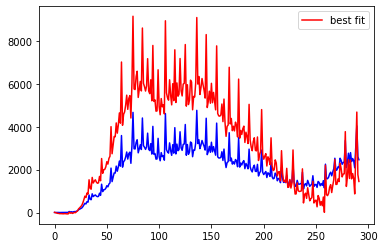

In [31]:
plt.plot(x, data, 'b')
# plt.plot(x, get_residual(out.params, x, data) + data, 'r', label='best fit')
plt.plot(x, get_residual(out.params, data, x) + data, 'r', label='best fit')
# plt.plot(x, get_residual(params, data, x), 'r', label='best fit')
plt.legend(loc='best')
plt.show()

In [32]:
S0 = out.params['S0'].value
E0 = out.params['E0'].value
I0 = out.params['I0'].value
R0 = out.params['R0'].value
N = out.params['N'].value
beta = out.params['beta'].value
gamma = out.params['gamma'].value
delta = out.params['delta'].value

y0 = S0, E0, I0, R0

ret = odeint(deriv, y0, x, args=(N, beta, gamma, delta))
dS, dE, dI, dR = ret.T

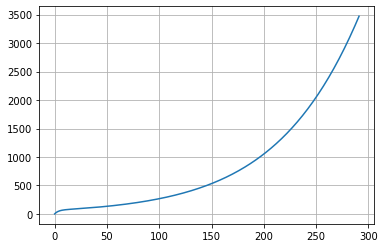

In [33]:
plt.plot(x, dI)
plt.grid('True')

In [34]:
def plotdata_population(t, s, e, i, r):
    # plot the data
    fig = plt.figure(figsize=(24,12))
    ax = fig.add_subplot(221, axisbelow=True)

    ax.plot(t, s, lw=3, label='Susceptible')
    ax.plot(t, i, lw=3, label='Infective')
    ax.plot(t, r, lw=3, label='Recovered')
    ax.plot(t, e, lw=3, label='Exposed')
    # plt.axis([0, 90, 0, 210_000_000])
    ax.set_title('Susceptible and Recovered Populations')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Fraction')

    ax.grid(True)
    ax.legend()

    plt.tight_layout()

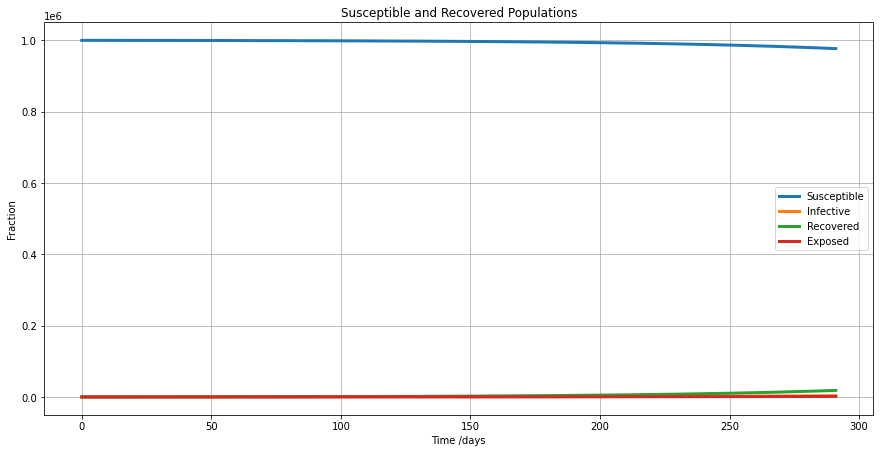

In [35]:
plotdata_population(x, dS, dE, dI, dR)